In [1]:
#Import Necessary librairies:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
#Read the Titanic datasets:
train_ds=pd.read_csv('train.csv')
test_ds=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

***Overview of the train and test datasets(Descriptive statistics)***

In [288]:
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [289]:
test_ds.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [290]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [291]:
train_ds.shape

(891, 12)

In [292]:
test_ds.shape

(418, 11)

In [293]:
gender_submission.shape

(418, 2)

In [294]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [295]:
train_ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [296]:
test_ds.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [297]:
train_ds.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [298]:
train_ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***Visualisation of the relationships between variables:***

<Axes: >

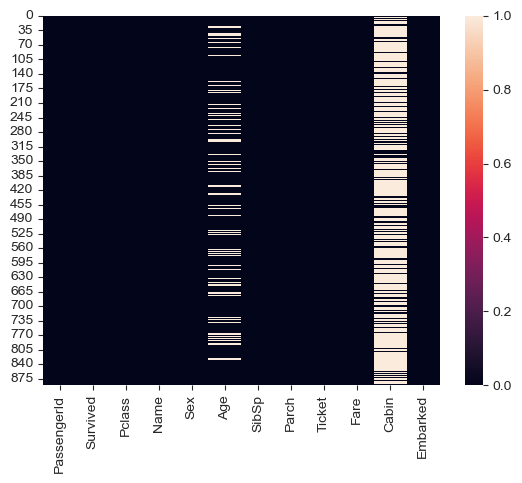

In [299]:
sns.heatmap(train_ds.isnull(),color='b')

D:\Nouveau dossier\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


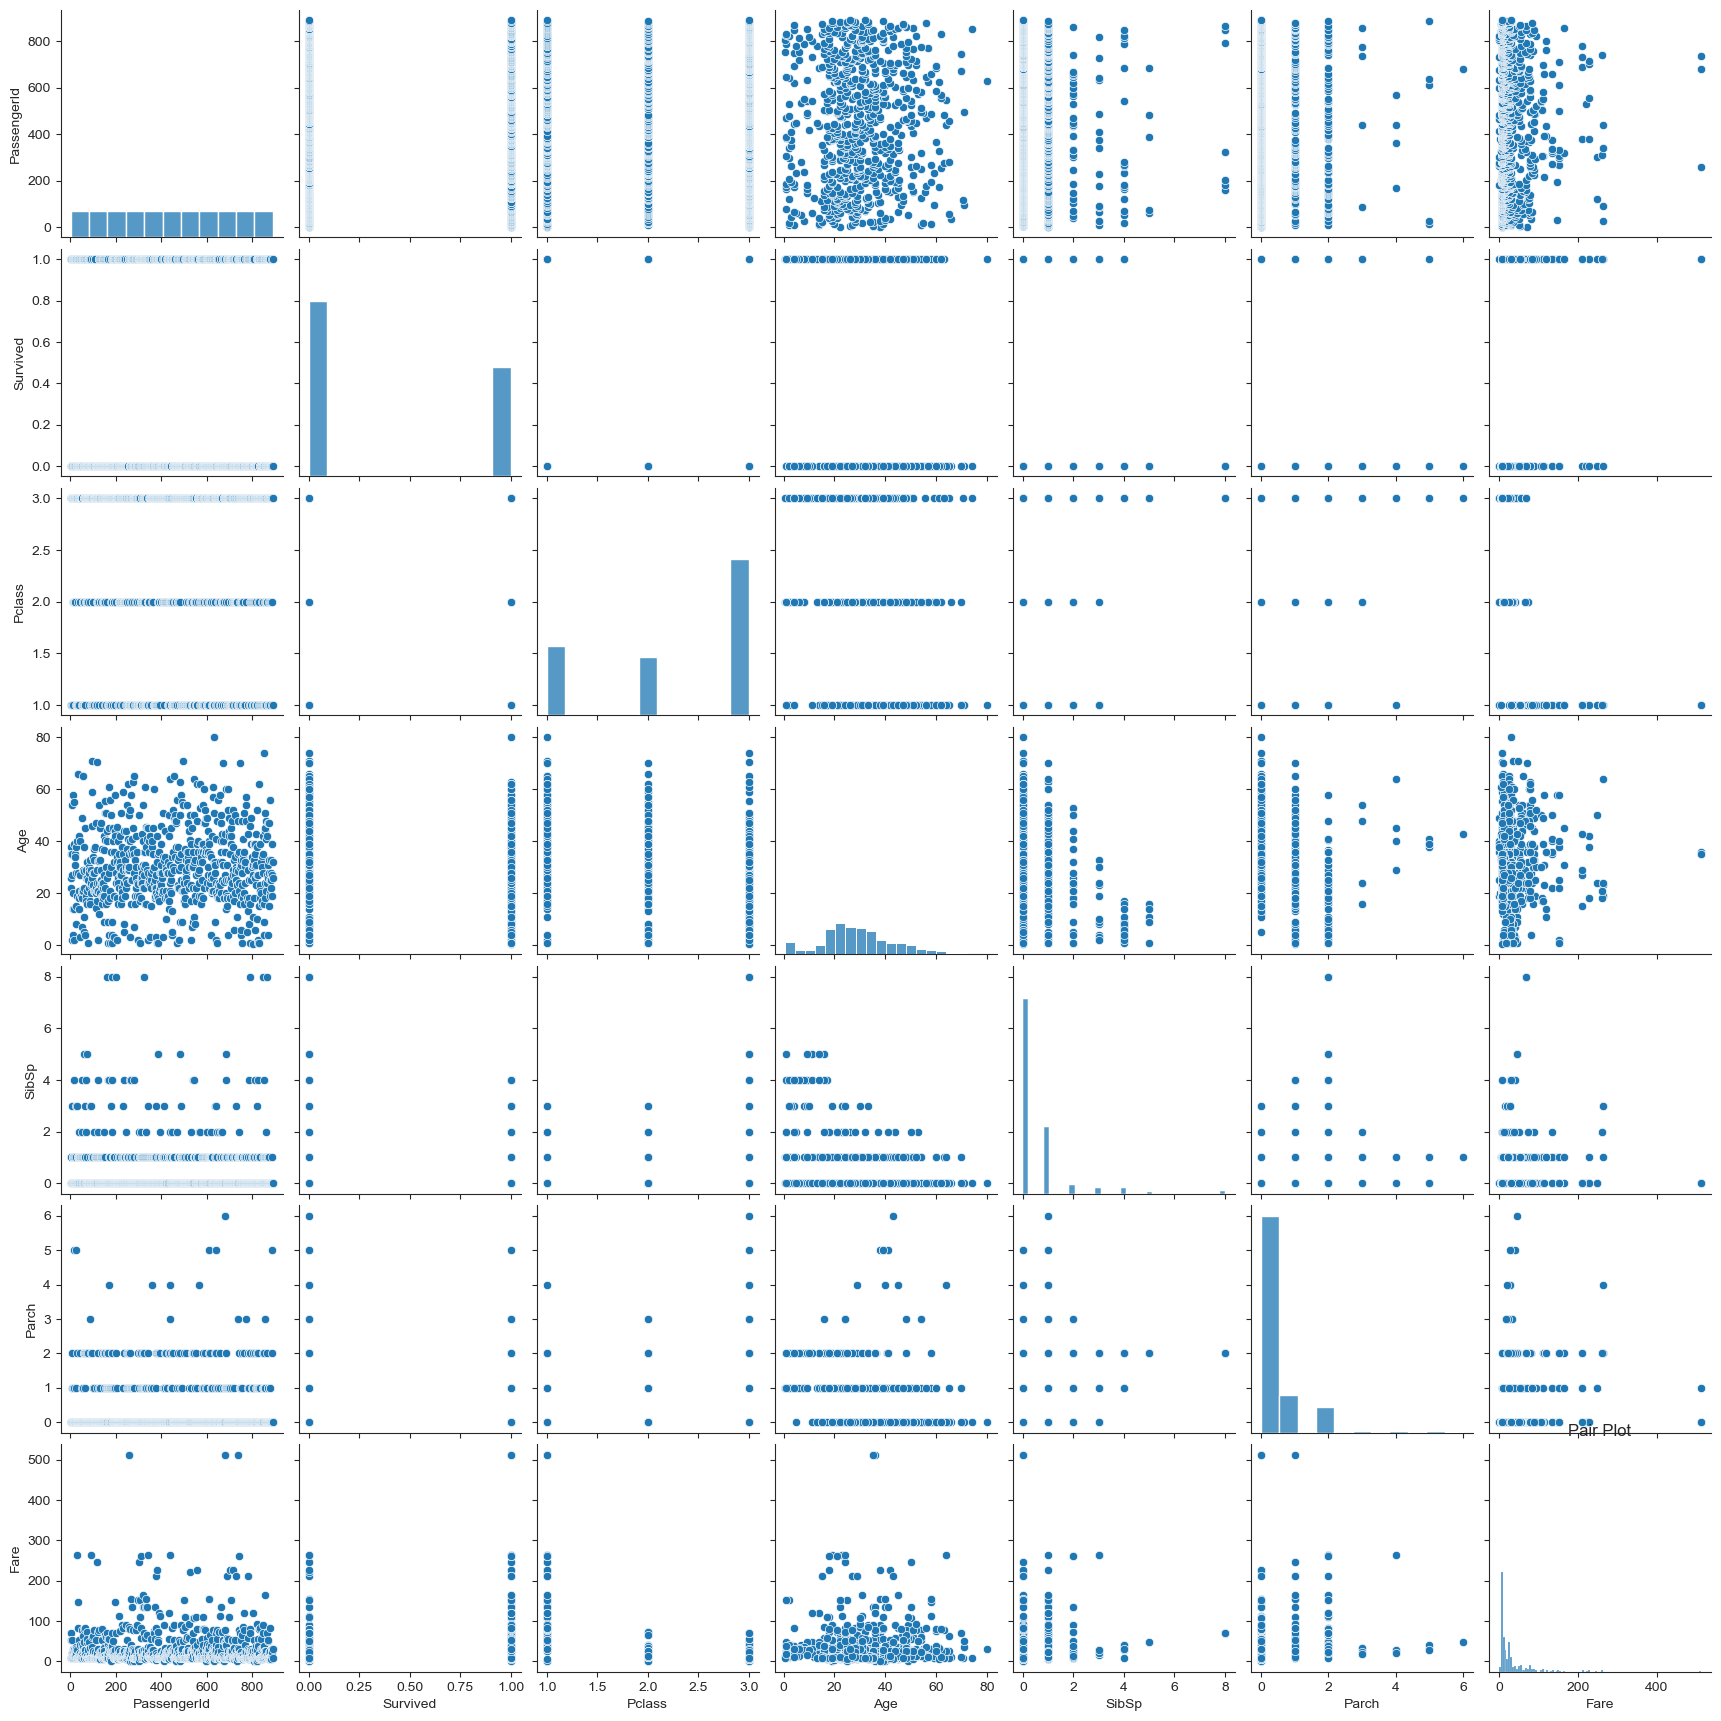

In [300]:
#pair plot:
sns.pairplot(train_ds)
plt.title('Pair Plot')
plt.show()

In [301]:
#pivot table
pivot = train_ds.pivot_table(index='Survived', values=['Age', 'Fare'], aggfunc='mean')
print(pivot)

                Age       Fare
Survived                      
0         30.626179  22.117887
1         28.343690  48.395408


<Axes: xlabel='Survived', ylabel='count'>

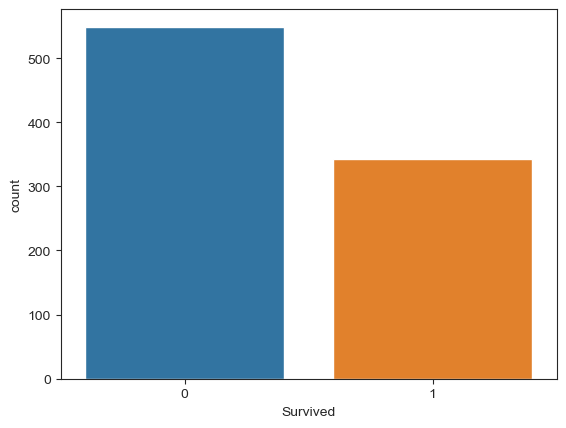

In [302]:
sns.set_style('ticks')
sns.countplot(x='Survived',data=train_ds)

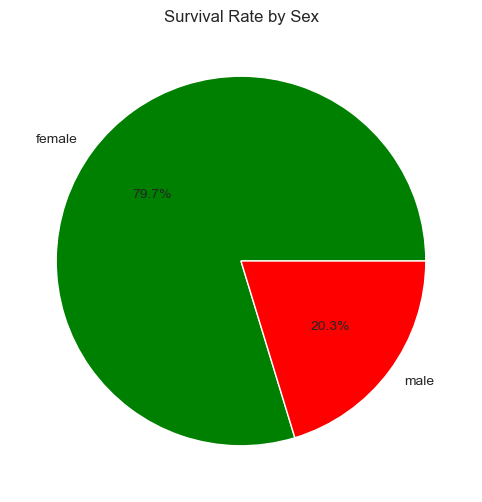

In [303]:
survived_sex = train_ds.groupby(['Sex'])['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.pie(survived_sex, labels=survived_sex.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Survival Rate by Sex')
plt.show()

It's evident that females had a significantly higher survival rate, nearing 80%, compared to males, who had a survival rate of approximately 20%.

<Axes: xlabel='Survived', ylabel='count'>

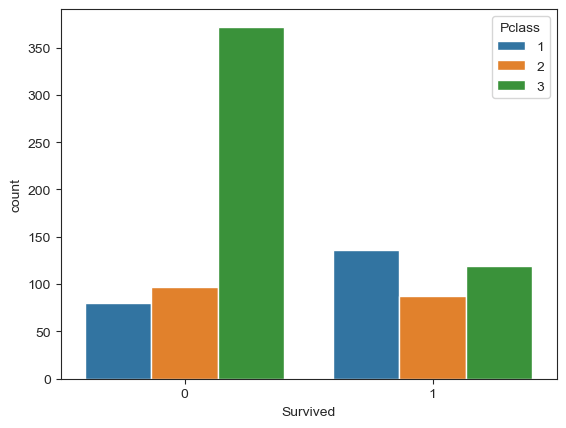

In [304]:
sns.set_style('ticks')
sns.countplot(x='Survived',hue='Pclass',data=train_ds) #by Pclass

The highest number of non-survivors belonged to Pclass 3, significantly outnumbering the other classes. Conversely, survivors predominantly came from Pclass 1, showing a stark contrast in distribution between survivors and non-survivors based on class.

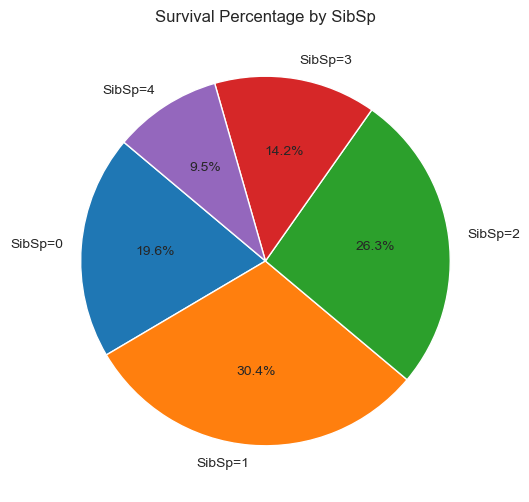

In [305]:
survival_percentages = [train_ds["Survived"][train_ds["SibSp"] == i].value_counts(normalize=True)[1] * 100 for i in range(5)]
plt.figure(figsize=(8, 6))
plt.pie(survival_percentages, labels=[f"SibSp={i}" for i in range(5)], autopct='%1.1f%%', startangle=140)
plt.title('Survival Percentage by SibSp')
plt.show()

It's evident that individuals with more siblings or spouses aboard had a reduced likelihood of survival. Surprisingly, those without any siblings or spouses were less likely to survive compared to those with one or two, despite predictions. The survival rates were notably lower, ranging from 19.6% to 30.4%, compared to 26.3% for those with one or two siblings or spouses.

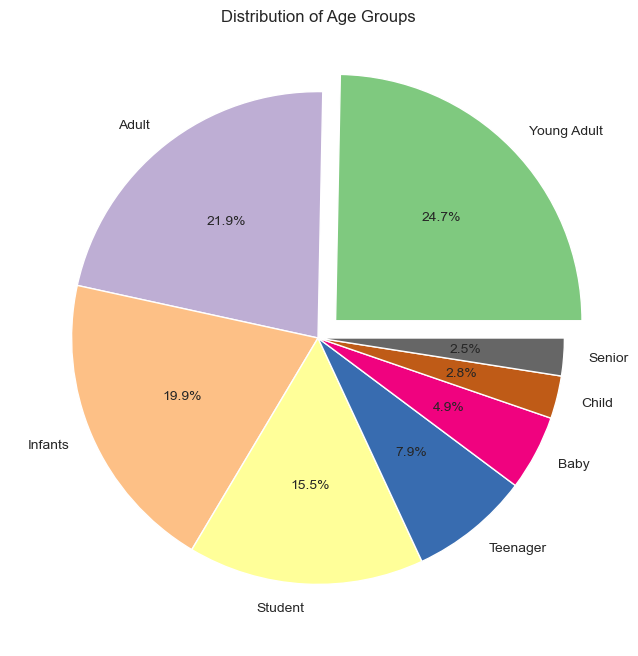

In [306]:
train_ds["Age"] = train_ds["Age"].fillna(-0.5)
test_ds["Age"] = test_ds["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Infants', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_ds['AgeGroup'] = pd.cut(train_ds["Age"], bins, labels=labels)
test_ds['AgeGroup'] = pd.cut(test_ds["Age"], bins, labels=labels)
plt.figure(figsize=(8, 8))
train_ds['AgeGroup'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Accent'), explode=(0.1, 0, 0, 0, 0, 0, 0, 0))
plt.title('Distribution of Age Groups')
plt.ylabel('')
plt.show()

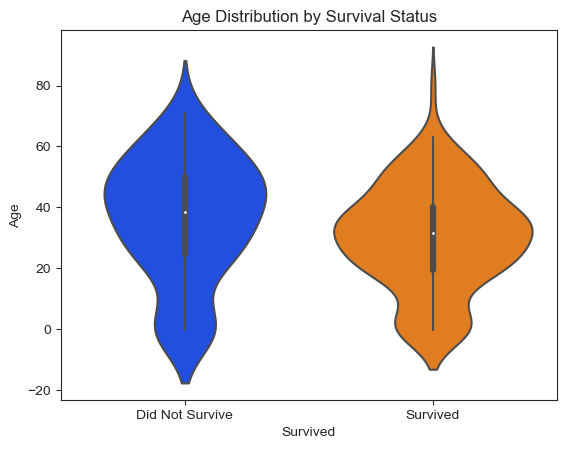

In [307]:
sns.violinplot(x='Survived', y='Age', data=train_ds.dropna(), palette="bright", as_cmap=True, split=True);
plt.title('Age Distribution by Survival Status'); 
plt.xlabel('Survived'); plt.ylabel('Age'); 
plt.xticks([0, 1], ['Did Not Survive', 'Survived']); plt.show()

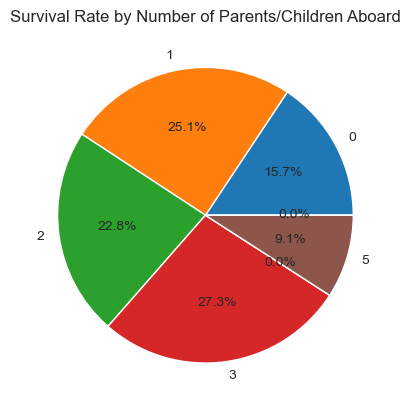

In [308]:
train_ds.groupby('Parch')['Survived'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()

The likelihood of survival is greater for passengers with four or fewer parents and children onboard. Conversely, individuals traveling alone have lower survival odds compared to families with three or more parents and children.

<Axes: xlabel='Pclass', ylabel='Age'>

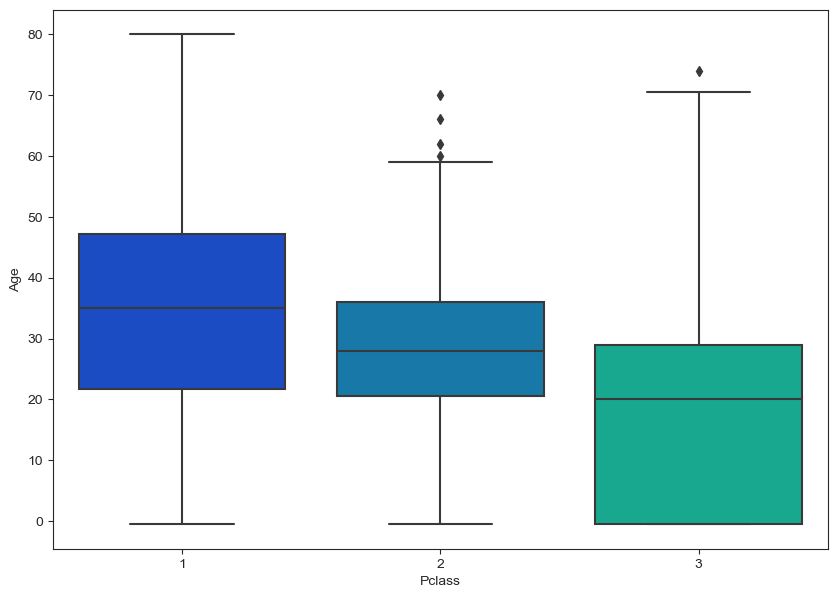

In [309]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass',y='Age',data=train_ds,palette='winter')

In [310]:
test_ds[['Age', 'Fare', 'Cabin']] = test_ds[['Age', 'Fare', 'Cabin']].apply(lambda x: x.fillna(x.mean() if x.name in ['Age', 'Fare'] else "Unknown"))

In [311]:
train_ds['Age'].fillna(train_ds['Age'].mean(), inplace=True);  
train_ds['Cabin'].fillna("Unknown", inplace=True)

In [312]:
train_ds['Sex'].replace(["male", "female"], [1, 0], inplace=True)

In [313]:
test_ds['Sex'].replace(["male", "female"], [1, 0], inplace=True)

In [314]:
train_ds.drop(columns=['Name','Ticket', 'Cabin'], inplace=True)

In [315]:
test_ds.drop(columns=['Name','Ticket', 'Cabin'], inplace=True)

In [316]:
Embarked = pd.get_dummies(train_ds['Embarked'],drop_first=True).astype(int)

In [317]:
train_ds.drop(['Embarked'],inplace = True, axis =1)

In [318]:
test_ds.drop(['Embarked'],inplace = True, axis =1)

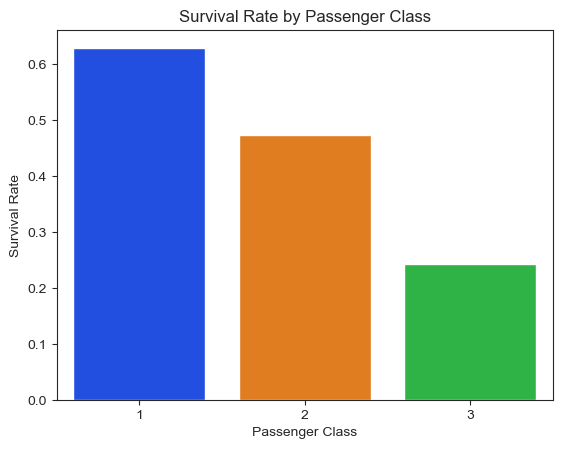

In [319]:
survival_rate_by_class = train_ds[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)
sns.barplot(x=survival_rate_by_class.index, y='Survived', data=survival_rate_by_class, palette='bright')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()